In [32]:
import matplotlib.pyplot as plt
import numpy as np
import math


In [33]:
def f(x):
    # Funición a evaluar
    a = 0
    for i in range(7+1):
        a += np.cos(x[i])*np.sin(x[i+1]) + np.cos(x[i+2])**2
    return a


def grad(x):
    """ Retorna gradiente f"""
    # g = np.array(
    #     [-np.sin(x[0])*np.sin(x[1]),
    #      np.cos(x[0])*np.cos(x[1]),
    #      -2*np.sin(x[2])*np.cos(x[2])])
    g = np.array([
        -np.sin(x[0])*np.sin(x[1]),
        -np.sin(x[1])*np.sin(x[2]) + np.cos(x[0])*np.cos(x[1]),
        -np.sin(x[2])*np.sin(x[3]) - 2*np.sin(x[2]) *
        np.cos(x[2]) + np.cos(x[1])*np.cos(x[2]),-np.sin(x[3])*np.sin(x[4]) - 2*np.sin(x[3]) *
        np.cos(x[3]) + np.cos(x[2])*np.cos(x[3]),
        -np.sin(x[4])*np.sin(x[5]) - 2*np.sin(x[4]) *
        np.cos(x[4]) + np.cos(x[3])*np.cos(x[4]),
        -np.sin(x[5])*np.sin(x[6]) - 2*np.sin(x[5]) *
        np.cos(x[5]) + np.cos(x[4])*np.cos(x[5]),
        -np.sin(x[6])*np.sin(x[7]) - 2*np.sin(x[6]) *
        np.cos(x[6]) + np.cos(x[5])*np.cos(x[6]),
        -np.sin(x[7])*np.sin(x[8]) - 2*np.sin(x[7]) *
        np.cos(x[7]) + np.cos(x[6])*np.cos(x[7]),
        -2*np.sin(x[8])*np.cos(x[8]) + np.cos(x[7])*np.cos(x[8]),
        -2*np.sin(x[9])*np.cos(x[9])
    ])
    return g


def hessiano(x):
    """Evalua la matriz Hessiana, ingresar derivadas"""
    return np.array(
      [
          [-np.sin(x[1])*np.cos(x[0]), -np.sin(x[0]) *
           np.cos(x[1]), 0, 0, 0, 0, 0, 0, 0, 0],
          [-np.sin(x[0])*np.cos(x[1]), -(np.sin(x[1])*np.cos(x[0]) + np.sin(x[2])
                                         * np.cos(x[1])), -np.sin(x[1])*np.cos(x[2]), 0, 0, 0, 0, 0, 0, 0],
          [0, -np.sin(x[1])*np.cos(x[2]), 2*np.sin(x[2])**2 - np.sin(x[2])*np.cos(x[1]) - np.sin(
              x[3])*np.cos(x[2]) - 2*np.cos(x[2])**2, -np.sin(x[2])*np.cos(x[3]), 0, 0, 0, 0, 0, 0],
          [0, 0, -np.sin(x[2])*np.cos(x[3]), 2*np.sin(x[3])**2 - np.sin(x[3])*np.cos(x[2]) - np.sin(
              x[4])*np.cos(x[3]) - 2*np.cos(x[3])**2, -np.sin(x[3])*np.cos(x[4]), 0, 0, 0, 0, 0],
          [0, 0, 0, -np.sin(x[3])*np.cos(x[4]), 2*np.sin(x[4])**2 - np.sin(x[4])*np.cos(x[3]) -
           np.sin(x[5])*np.cos(x[4]) - 2*np.cos(x[4])**2, -np.sin(x[4])*np.cos(x[5]), 0, 0, 0, 0],
          [0, 0, 0, 0, -np.sin(x[4])*np.cos(x[5]), 2*np.sin(x[5])**2 - np.sin(x[5])*np.cos(
              x[4]) - np.sin(x[6])*np.cos(x[5]) - 2*np.cos(x[5])**2, -np.sin(x[5])*np.cos(x[6]), 0, 0, 0],
          [0, 0, 0, 0, 0, -np.sin(x[5])*np.cos(x[6]), 2*np.sin(x[6])**2 - np.sin(x[6])*np.cos(
              x[5]) - np.sin(x[7])*np.cos(x[6]) - 2*np.cos(x[6])**2, -np.sin(x[6])*np.cos(x[7]), 0, 0],
          [0, 0, 0, 0, 0, 0, -np.sin(x[6])*np.cos(x[7]), 2*np.sin(x[7])**2 - np.sin(x[7])*np.cos(
              x[6]) - np.sin(x[8])*np.cos(x[7]) - 2*np.cos(x[7])**2, -np.sin(x[7])*np.cos(x[8]), 0],
          [0, 0, 0, 0, 0, 0, 0, -np.sin(x[7])*np.cos(x[8]), 2*np.sin(
              x[8])**2 - np.sin(x[8])*np.cos(x[7]) - 2*np.cos(x[8])**2, 0],
          [0, 0, 0, 0, 0, 0, 0, 0, 0, 2*(np.sin(x[9])**2 - np.cos(x[9])**2)]
      ]
        
  )

def dirgrad(x):
    """Retorna la dirección del gradiente p"""
    vgrad = grad(x)
    magGrad = np.sqrt(vgrad.dot(vgrad))
    p = -vgrad/magGrad
    return p


def phiAlpha(x0, alpha, p):
    paX = x0 + p * alpha
    return f(paX)


def phipAlpha(x0, alpha, p):
    x = x0 + alpha * p
    vgrad = grad(x)
    return (np.dot(vgrad, p))


def phipp(x0, alpha, p):
    x = x0 + alpha * p
    ahess = hessiano(x)
    return np.dot(np.dot(ahess, p), p)


In [34]:
def cw(x0, p, alpha, c1=1e-4, c2=1):
    """Condiciones de Wolfe"""
    armijo = False
    curvatura = False
    wolfe = False

    recta = phiAlpha(x0, 0, p) + c1*phipAlpha(x0, alpha, p)*alpha

    if phiAlpha(x0, alpha, p) <= recta:
        armijo = True

    if np.abs(phipAlpha(x0, alpha, p)) <= c2*np.abs(phipAlpha(x0, 0, p)):
        curvatura = True

    if curvatura and armijo:
        wolfe = True
    return (wolfe)


def rectaWlf(x0, alpha, p, c1):
    recta = phiAlpha(x0, 0, p) + c1*alpha*phipAlpha(x0, 0, p)
    return recta


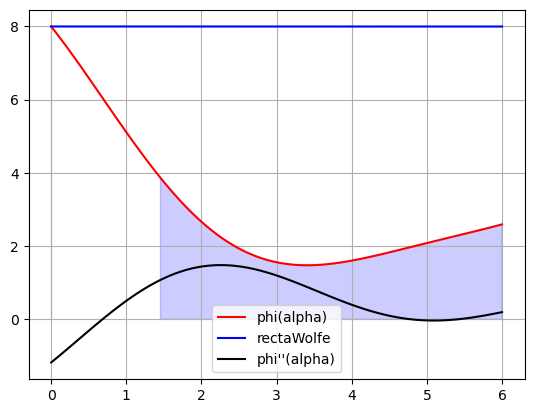

In [35]:
x0 = np.array([1, 1, 1, 1, 1, .1, .1, .1, .1, .1])
p = dirgrad(x0)
alpha = np.linspace(0, 6, 100)
rectWolfe = []


for i in alpha:
    rectWolfe.append(rectaWlf(x0, i, p, 1e-4,))

condicionesWolfe = []
for i in alpha:
    condicionesWolfe.append(cw(x0, p, i))


def puntos(x0, alfa, p):
    x = x0 + p*alfa
    return f(x)


ppts = []
for i in alpha:
    ppts.append(phiAlpha(x0, i, p))

phibiprima = []
for i in alpha:
    phibiprima.append(phipp(x0, i, p))


plt.fill_between(
    x=alpha,
    y1=ppts,
    where=(condicionesWolfe),
    color="b",
    alpha=0.2)


plt.plot(alpha, ppts, 'r', label="phi(alpha)")
plt.plot(alpha, rectWolfe, 'b', label="rectaWolfe")
plt.plot(alpha, phibiprima, 'k', label="phi''(alpha)")
plt.legend()
plt.grid()
plt.show()


In [36]:
def newton(x0, alpha, p, k):
    tol = 1e-9
    while abs(phipAlpha(x0, alpha, p)) > tol:

        phiprima = phipAlpha(x0, alpha, p)
        phibiprima = phipp(x0, alpha, p)
        alphaNew = alpha - (phiprima/phibiprima)

        # print(k, alphaNew, x0, phiprima, phibiprima,
        #       abs(phipAlpha(x0, alpha, p)))

        alpha = alphaNew
        k += 1

    return alpha


def exhaustivoRefinadoNewton(xini, p, alpha=0, h=0.001, tol=1e-6):
    """Busqueda de minimo con metodo exhaustivo refinado. puedes cambiar el paso
    Retorna f(a) y alpha
    """
    k = 0
    while h > tol:
        while phiAlpha(xini, alpha+h, p) < phiAlpha(xini, alpha, p):
            alpha = alpha + h
            print(k, alpha, phiAlpha(x0, alpha, p), phipAlpha(
                x0, alpha, p), phipp(x0, alpha, p) > 0)
            k += 1
        alpha = alpha-h
        h = h / 10
    # alpha = newton(xini, alpha, p, k)
    if (alpha > 0 and cw(x0, p, alpha) == True):
        alpha = newton(x0, alpha, p, k)
    else:
        raise Exception("ERROR: alpha no cumple condiciones de Wolfe")
    return alpha


def exhaustivoNewton(x0, p, alpha=0, h=0.001, tol=1e-6):
    """Busqueda de minimo con metodo exhaustivo. puedes cambiar el paso
    Retorna f(a) y alpha
    """
    k = 0
    # while h > tol:
    while phiAlpha(x0, alpha+h, p) < phiAlpha(x0, alpha, p):
        alpha = alpha + h
        k += 1
    if (cw(x0, p, alpha) == True):
        alpha = newton(x0, alpha, p, k)
        if (phipp(x0, alpha, p) > 0 and phipAlpha(x0, alpha, p) < tol):
            return alpha , k
        else:
            raise Exception("ERROR: alpha no cumple condiciones de primer o segundo orden")
    else:
            raise Exception("ERROR: alpha no cumple condiciones de Wolfe")

    

    # return alpha


In [41]:
alpha1 = exhaustivoNewton(x0,p, alpha=0, h=0.01, tol=1e-9)
alpha1[0]

3.405738651258825

In [42]:
x1 = x0 +alpha1[0]*p
x1

array([ 1.93337843,  1.54856244,  2.74719324,  2.74719324,  1.92455227,
       -0.33364247, -0.9300335 , -0.9300335 , -0.94317156,  0.3618848 ])